In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [19]:
df = pd.read_csv('sample_data/Q1_Dataset.csv')
df = df.drop_duplicates()
duplicate_rows = df[df.duplicated()]
print("Duplicate rows found:", len(duplicate_rows))

Duplicate rows found: 0


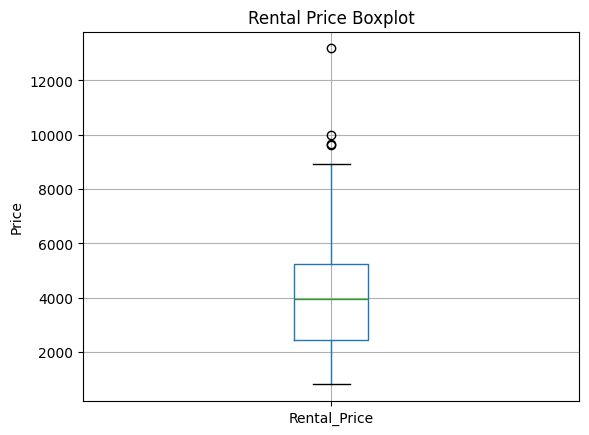

In [20]:
# ---------------------------------------------------------------------#
# a)
df.boxplot(column='Rental_Price')
plt.ylabel('Price')
plt.title('Rental Price Boxplot')
plt.show()


In [21]:
# ---------------------------------------------------------------------#
# b)
# Standardize neighborhood names
df['Neighborhood'] = df['Neighborhood'].str.title()

# Compute correlation between size and rental price in each neighborhood
correlations = df.groupby('Neighborhood').apply(
    lambda x: x['Size_in_Sqft'].corr(x['Rental_Price'])
).reset_index(name='Size_Price_Correlation')

# Identify neighborhoods where the correlation is weak (e.g., < 0.3)
misaligned_neighborhoods = correlations[correlations['Size_Price_Correlation'].abs() < 0.3]

misaligned_neighborhoods



<ipython-input-21-ebd84d558005>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = df.groupby('Neighborhood').apply(


,Neighborhood,Size_Price_Correlation


Correlation between distance to city center and rental price: -0.29


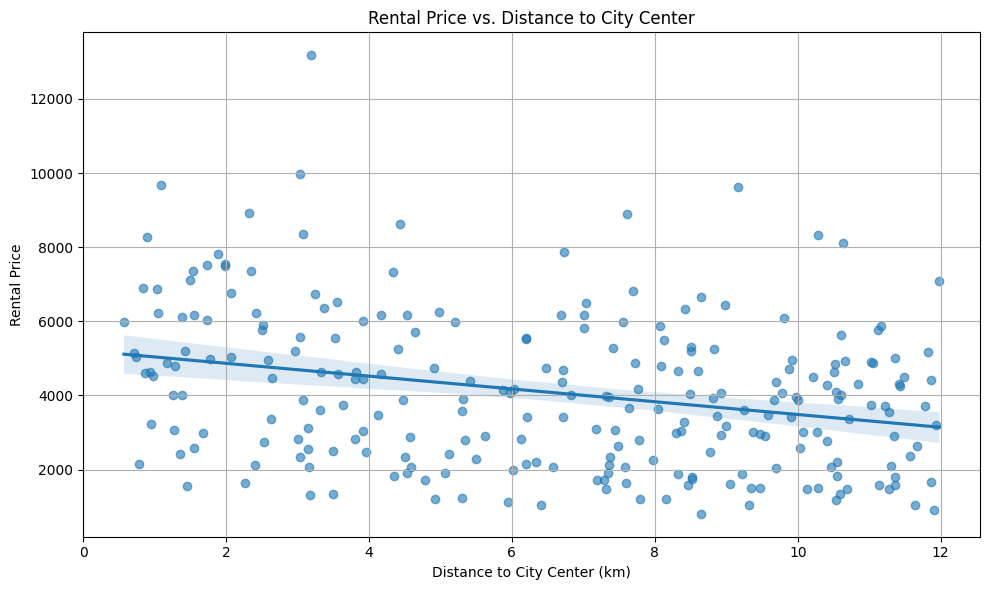

In [22]:
# ---------------------------------------------------------------------#
# c)
correlation_dis_rent = df['Distance_to_City_Center'].corr(df['Rental_Price'])
print(f"Correlation between distance to city center and rental price: {correlation_dis_rent:.2f}")

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Distance_to_City_Center', y='Rental_Price', data=df, scatter_kws={'alpha':0.6})
plt.title('Rental Price vs. Distance to City Center')
plt.xlabel('Distance to City Center (km)')
plt.ylabel('Rental Price')
plt.grid(True)
plt.tight_layout()
plt.show()